In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

import random
from pprint import pprint
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
import sys
import os



In [ ]:
save = drive.CreateFile({'id':'1jtpVO0tqlxK2xuDez23ZVsZoxaYSjs6k'}) # replace the id with id of file you want to access
save.GetContentFile('decision_tree_functions.py')
#https://drive.google.com/file/d/1jtpVO0tqlxK2xuDez23ZVsZoxaYSjs6k/view?usp=sharing

In [ ]:
from decision_tree_functions import *
import decision_tree_functions

In [ ]:
from decision_tree_functions import decision_tree_algorithm, decision_tree_predictions
from helper_functions import train_test_split, calculate_accuracy

In [ ]:
!ls

adc.json		    helper_functions.py  sample_data
decision_tree_functions.py  __pycache__


In [ ]:
!pwd

/content


In [ ]:
df = pd.read_csv("/content/winequality-red.csv")
#https://drive.google.com/file/d/1BvFh6umkT3cY4jyaUj77wBwV1g0kKd2D/view?usp=sharing
df["label"] = df.quality
df = df.drop("quality", axis=1)

column_names = []
for column in df.columns:
    name = column.replace(" ", "_")
    column_names.append(name)
df.columns = column_names

df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


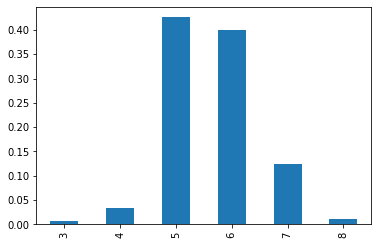

In [ ]:
wine_quality = df.label.value_counts(normalize=True)
wine_quality = wine_quality.sort_index()
wine_quality.plot(kind="bar")

In [ ]:
def transform_label(value):
    if value <= 5:
        return "bad"
    else:
        return "good"

df["label"] = df.label.apply(transform_label)

good    0.534709
bad     0.465291
Name: label, dtype: float64

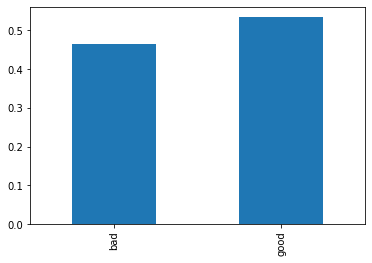

In [ ]:
wine_quality = df.label.value_counts(normalize=True)
wine_quality[["bad", "good"]].plot(kind="bar")
wine_quality

In [ ]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size=0.2)

**Random Forrest**

In [ ]:
def bootstrapping(train_df, n_bootstrap):
    bootstrap_indices = np.random.randint(low=0, high=len(train_df), size=n_bootstrap)
    df_bootstrapped = train_df.iloc[bootstrap_indices]
    
    return df_bootstrapped

def random_forest_algorithm(train_df, n_trees, n_bootstrap, n_features, dt_max_depth):
    forest = []
    for i in range(n_trees):
        df_bootstrapped = bootstrapping(train_df, n_bootstrap)
        tree = decision_tree_algorithm(df_bootstrapped, max_depth=dt_max_depth, random_subspace=n_features)
        forest.append(tree)
    
    return forest

def random_forest_predictions(test_df, forest):
    df_predictions = {}
    for i in range(len(forest)):
        column_name = "tree_{}".format(i)
        predictions = decision_tree_predictions(test_df, tree=forest[i])
        df_predictions[column_name] = predictions

    df_predictions = pd.DataFrame(df_predictions)
    random_forest_predictions = df_predictions.mode(axis=1)[0]
    
    return random_forest_predictions

In [ ]:
forest = random_forest_algorithm(train_df, n_trees=4, n_bootstrap=800, n_features=2, dt_max_depth=4)
predictions = random_forest_predictions(test_df, forest)
accuracy = calculate_accuracy(predictions, test_df.label)

print("Accuracy = {}".format(accuracy))

Accuracy = 0.740625


In [ ]:
print("Prediction = {}".format(predictions))

Prediction = 788      bad
1552     bad
861      bad
82       bad
530     good
        ... 
562      bad
927      bad
525      bad
273      bad
1338     bad
Name: 0, Length: 320, dtype: object
